# **MIDTERM DEEP LEARNING**
**GVHD: LÊ ANH CƯỜNG**

**Team member**

Trần Thị Vẹn - 52100674

Nguyễn Thanh Tú - 52100349

Võ Luyện - 52100911



# Practical Implementation:

-	Choose a deep learning framework (PyTorch) and implement a simple neural network model from scratch using Autograd capabilities.

-	Define a custom loss function and explore how Autograd computes gradients for this function.

-	Experiment with different optimization algorithms (e.g., SGD, Adam) and observe their effects on training convergence and performance.

# Experimental Analysis:
-	Conduct experiments to analyze the efficiency and numerical stability of Autograd-based gradient computations.
-	Investigate the impact of batch size, learning rate, and network architecture on gradient computation and training dynamics.

Question 2:

- Implement CNN-LSTM models for the problem of Image Captioning with at least two options: with and without using attention mechanism for the decoding process.

- Training the models on Colab environments using GPU and CPU only.


# Practical Implementation:
Choose a deep learning framework (PyTorch) and implement a simple neural network model from scratch using Autograd capabilities.

Define a custom loss function and explore how Autograd computes gradients for this function.

Experiment with different optimization algorithms (e.g., SGD, Adam) and observe their effects on training convergence and performance.

In [ ]:
pip install -v autograd

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn as nn
from sklearn.datasets import fetch_california_housing


In [4]:
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X = torch.FloatTensor(X_train)
y = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

### Choose a deep learning framework (PyTorch)
### Implement a simple neural network model from scratch using Autograd capabilities.

In [7]:
# Define a simple neural network class
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Define training parameters
input_size = X_train.shape[1]
output_size = 1
learning_rate = 0.01
epochs = 300

In [8]:
# Define a custom loss function
def custom_loss(output, target):
    loss = torch.mean((output - target) ** 2)
    return loss

### Observe how Autograd computes gradients

Nếu chúng ta xem xét các lớp của mô hình, ta có thể kiểm tra các giá trị của trọng số và xác minh rằng chưa có độ dốc nào được tính toán:

In [9]:
model = SimpleNeuralNetwork(input_size, output_size)

In [10]:
print(model.fc3.weight[0][0:10]) # just a small slice
print(model.fc3.weight.grad)

tensor([ 0.2414,  0.2311,  0.2874,  0.1818, -0.2090,  0.2980, -0.3002,  0.3477],
       grad_fn=<SliceBackward0>)
None


In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Xem thay đổi như thế nào khi chúng ta thực hiện một đợt training đối với loss fution, đồng thời chúng ta sẽ sử dụng hàm tối ưu hóa gradient.

In [12]:
outputs = model(X) # Forward prop
loss = custom_loss(outputs, y)
optimizer.zero_grad() # Clear the gradient buffer
print(loss)

tensor(4.7298, grad_fn=<MeanBackward0>)


Bây giờ, hãy gọi loss.backward()

In [13]:
loss.backward() # Backprop\
print(model.fc3.weight[0][0:10])
print(model.fc3.weight.grad[0][0:10])

tensor([ 0.2414,  0.2311,  0.2874,  0.1818, -0.2090,  0.2980, -0.3002,  0.3477],
       grad_fn=<SliceBackward0>)
tensor([-0.7287, -0.1095, -0.0788, -0.1719, -0.0563, -0.6163, -1.8003, -0.1488])


Chúng ta có thể thấy rằng gradient đã được tính toán cho từng trọng số học tập, nhưng các trọng số vẫn không thay đổi vì chúng ta chưa chạy hàm tối ưu hoá. Hàm tối ưu hóa chịu trách nhiệm cập nhật trọng số mô hình dựa trên gradient được tính toán.

In [14]:
optimizer.step() # Update weights
print(model.fc3.weight[0][0:10])
print(model.fc3.weight.grad[0][0:10])

tensor([ 0.2421,  0.2312,  0.2875,  0.1820, -0.2089,  0.2986, -0.2984,  0.3478],
       grad_fn=<SliceBackward0>)
tensor([-0.7287, -0.1095, -0.0788, -0.1719, -0.0563, -0.6163, -1.8003, -0.1488])


### Define a custom loss function and explore how Autograd computes gradients for this function.

In [15]:
import torch

class MeanSquaredError(torch.autograd.Function):
    @staticmethod
    def forward(ctx, inputs, targets):
        ctx.save_for_backward(inputs, targets)
        return torch.mean((inputs - targets) ** 2)

    @staticmethod
    def backward(ctx, grad_output):
        inputs, targets = ctx.saved_tensors
        grad_inputs = 2 * (inputs - targets) * grad_output / inputs.numel()
        return grad_inputs, -grad_inputs
# Example usage
inputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)

loss = MeanSquaredError.apply(inputs, targets)
loss.backward()

print(f"Input gradients: {inputs.grad}")

Input gradients: tensor([[ 0.1416,  0.3706, -0.2735, -0.0452, -0.2074],
        [ 0.1273, -0.0877,  0.1139, -0.0766, -0.0895],
        [ 0.1951, -0.0998, -0.0098,  0.1715,  0.1443]])


Phương thức backward có trách nhiệm tính toán đạo hàm của hàm mất mát so với đầu vào. Nó lấy đầu vào và mục tiêu đã lưu bằng cách sử dụng ctx.saved_tensors. Sau đó, nó tính toán đạo hàm bằng công thức:

### grad_inputs = 2 * (inputs - targets) * grad_output / inputs.numel()

grad_output là đạo hàm của hàm mất mát so với đầu ra từ quá trình lan truyền xuôi (trong trường hợp này, nó là một giá trị scalar bằng 1).

Đạo hàm được trả về dưới dạng một tuple, phần tử đầu tiên tương ứng với đạo hàm so với đầu vào, và phần tử thứ hai tương ứng với đạo hàm so với mục tiêu (là -grad_inputs vì mục tiêu được xem như hằng số).

Trong phần sử dụng ví dụ, chúng ta tạo ngẫu nhiên đầu vào và mục tiêu, tính toán hàm mất mát bằng cách sử dụng MeanSquaredError.apply(inputs, targets), và gọi loss.backward() để tính toán đạo hàm.

Cuối cùng, chúng ta in ra đạo hàm so với đầu vào bằng cách sử dụng inputs.grad.

### Experiment with different optimization algorithms (e.g., SGD, Adam) and observe their effects on training convergence and performance.

SGD - Epoch 1/300, Loss: 6.067559242248535
SGD - Epoch 101/300, Loss: 0.948240339756012
SGD - Epoch 201/300, Loss: 0.6603571772575378
Adam - Epoch 1/300, Loss: 4.384160995483398
Adam - Epoch 101/300, Loss: 0.47684362530708313
Adam - Epoch 201/300, Loss: 0.3594013750553131
RMSprop - Epoch 1/300, Loss: 6.809846878051758
RMSprop - Epoch 101/300, Loss: 0.40870222449302673
RMSprop - Epoch 201/300, Loss: 0.36852896213531494
AdamW - Epoch 1/300, Loss: 4.8911967277526855
AdamW - Epoch 101/300, Loss: 0.43598097562789917
AdamW - Epoch 201/300, Loss: 0.3712499737739563


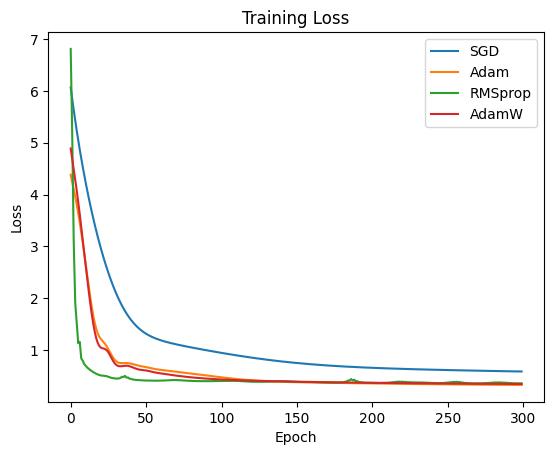

In [16]:
# Experiment with different optimization algorithms: SGD and Adam
epochs = 300
optimizers = {
    "SGD": torch.optim.SGD(model.parameters(), lr=learning_rate),
    "Adam": torch.optim.Adam(model.parameters(), lr=learning_rate),
    "RMSprop": torch.optim.RMSprop(model.parameters(), lr=learning_rate),
    "AdamW": torch.optim.AdamW(model.parameters(), lr=learning_rate)
}

# Training loop
for optimizer_name, optimizer in optimizers.items():
    losses = []
    model = SimpleNeuralNetwork(input_size, output_size)
    if(optimizer_name=="Adam"):
        optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
    if(optimizer_name=="SGD"):
        optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
    if(optimizer_name=="RMSprop"):
        optimizer=torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    if(optimizer_name=="AdamW"):
        optimizer=torch.optim.AdamW(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        # Forward pass
        outputs = model.forward(X)

        # Compute loss
        loss = custom_loss(outputs, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss
        losses.append(loss.item())

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"{optimizer_name} - Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

    # Plot loss curve
    plt.plot(losses, label=optimizer_name)

plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Khám phá Autograd:

Trong bước truyền ngược, Autograd tự động tính toán gradient của hàm mất mát đối với tất cả các tham số của mô hình.
Gradient được sử dụng bởi trình tối ưu hóa để cập nhật các tham số theo hướng giảm thiểu hàm mất mát.

### SGD (Stochastic Gradient Descent):
Convergence Behavior: Thường cần nhiều epochs để hội tụ vì nó có thể bị rơi vào các điểm địa phương trên định hướng của hàm mất mát.
Final Performance: Có thể đạt được kết quả tốt khi được sử dụng với tốc độ học phù hợp và kích thước batch lớn. Tuy nhiên, nó có thể cần thêm thời gian huấn luyện so với các phương pháp tối ưu hóa khác.

### Adam:
Convergence Behavior: Thường hội tụ nhanh hơn so với SGD do sử dụng tỷ lệ học động.

Final Performance: Có thể đạt được hiệu suất tốt ngay từ đầu huấn luyện. Adam thường là lựa chọn ưa thích vì khả năng tương thích với nhiều loại mô hình và dễ sử dụng.

### RMSprop:
Convergence Behavior: Có thể giúp hội tụ nhanh hơn so với SGD, đặc biệt khi có độ dốc biến đổi đáng kể.

Final Performance: RMSprop có thể mang lại hiệu suất tốt nhưng đôi khi cũng cần điều chỉnh siêu tham số cho phù hợp với bài toán cụ thể.

### AdamW:
Convergence Behavior: Tương tự như Adam, nhưng cải thiện về mặt lý thuyết bằng cách chỉnh sửa hệ số decay trọng số trong quá trình cập nhật trọng số.

Final Performance: AdamW có thể giúp tránh tình trạng overfitting và cải thiện hiệu suất cuối cùng của mô hình, đặc biệt khi mô hình có nhiều trọng số.


# Experimental Analysis:
- Conduct experiments to analyze the efficiency and numerical stability of Autograd-based gradient computations.
- Investigate the impact of batch size, learning rate, and network architecture on gradient computation and training dynamics.

### Conduct experiments to analyze the efficiency and numerical stability of Autograd-based gradient computations.

In [17]:
import torch
import time
import matplotlib.pyplot as plt

In [18]:
# Function for our experiment
def compute_loss(x, y, w):
    # Compute the loss (Mean Squared Error)
    loss = torch.mean((torch.matmul(x, w) - y)**2)
    return loss

In [19]:
# Function to manually compute gradients
def manual_gradient(x, y, w):
    # Compute gradients manually
    grad = 2 * torch.matmul(x.t(), torch.matmul(x, w) - y) / x.size(0)
    return grad

In [20]:
# Experiment setup
input_size = 1000
output_size = 1
num_samples = 1000
learning_rate = 0.01
epochs = 100

# Generate random data
x = torch.randn(num_samples, input_size)
y = torch.randn(num_samples, output_size)
w = torch.randn(input_size, output_size, requires_grad=True)  # Ensure gradients are tracked

# Lists to store losses and computation times
autograd_losses = []
manual_losses = []
autograd_times = []
manual_times = []

In [21]:
# Autograd-based gradient computation
for epoch in range(epochs):
    start_time = time.time()
    # Forward pass
    loss = compute_loss(x, y, w)

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    # Manually zero the gradients after updating weights
    w.grad.zero_()

    autograd_losses.append(loss.item())
    autograd_times.append(time.time() - start_time)

# Manual gradient computation
w = torch.randn(input_size, output_size, requires_grad=True)  # Reset weights with gradients tracked
for epoch in range(epochs):
    start_time = time.time()
    # Forward pass
    loss = compute_loss(x, y, w)

    # Compute gradients manually
    grad = manual_gradient(x, y, w)

    # Update weights
    with torch.no_grad():
        w -= learning_rate * grad

    manual_losses.append(loss.item())
    manual_times.append(time.time() - start_time)

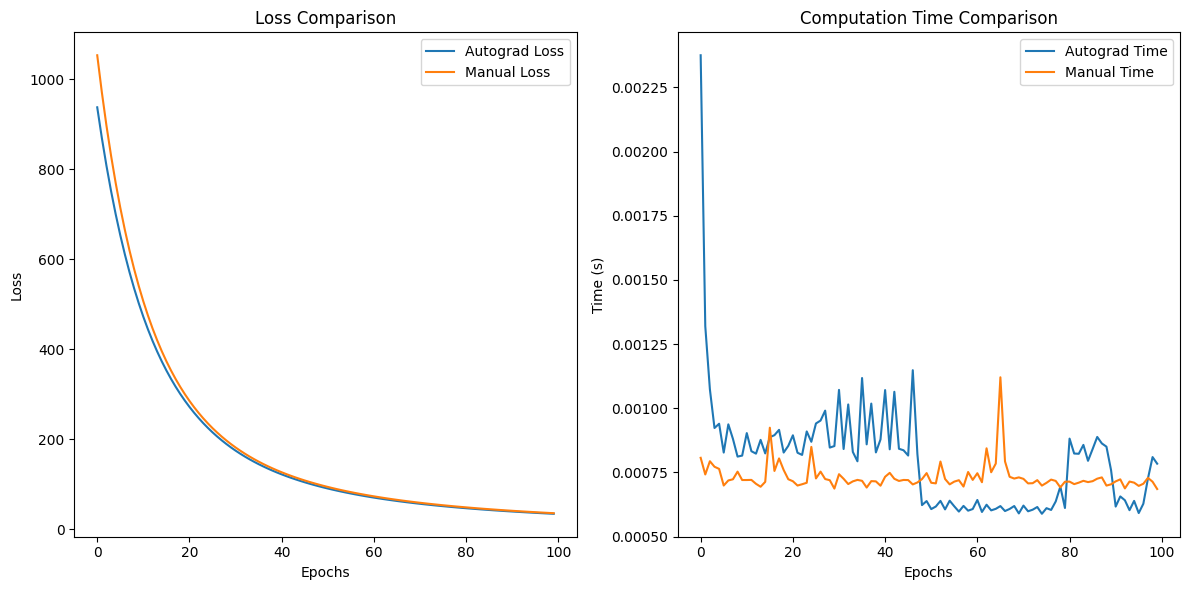

In [22]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), autograd_losses, label='Autograd Loss')
plt.plot(range(epochs), manual_losses, label='Manual Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), autograd_times, label='Autograd Time')
plt.plot(range(epochs), manual_times, label='Manual Time')
plt.xlabel('Epochs')
plt.ylabel('Time (s)')
plt.title('Computation Time Comparison')
plt.legend()

plt.tight_layout()
plt.show()

### Investigate the impact of batch size, learning rate, and network architecture on gradient computation and training dynamics.

In [23]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

In [24]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
full_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset_list = torch.utils.data.random_split(full_dataset, [len(full_dataset)//2, len(full_dataset)//2])

trainset = train_dataset_list[0]

test_dataset_list = torch.utils.data.random_split(test_dataset, [len(test_dataset)//2, len(test_dataset)//2])
testset = test_dataset_list[0]

100%|██████████| 9912422/9912422 [00:00<00:00, 271706485.19it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 23317746.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 156443355.05it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4499416.34it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [25]:
# Định nghĩa mô hình
class Net(nn.Module):
    def __init__(self, num_channels):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, num_channels, kernel_size=5)
        self.conv2 = nn.Conv2d(num_channels, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [26]:
# Hàm huấn luyện
def train(model, device, train_loader, optimizer, epoch, log_interval=200):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.functional.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [27]:
# Hàm kiểm tra
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.functional.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    return test_loss

In [28]:
# Thí nghiệm tác động của kích thước batch
def experiment_batch_size(batch_sizes):
    train_losses = []
    test_losses = []
    forward_times = []
    backward_times = []

    for batch_size in batch_sizes:
        train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True)

        model = Net(num_channels=10).to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        epochs = 10

        train_loss = []
        test_loss = []

        for epoch in range(1, epochs + 1):
            train(model, device, train_loader, optimizer, epoch)
            train_loss.append(test(model, device, train_loader))
            test_loss.append(test(model, device, test_loader))

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Đo thời gian tính toán gradient
        data, target = next(iter(train_loader))
        data, target = data.to(device), target.to(device)

        start = time.time()
        output = model(data)
        forward_time = time.time() - start

        start = time.time()
        loss = nn.functional.cross_entropy(output, target)
        loss.backward()
        backward_time = time.time() - start

        forward_times.append(forward_time)
        backward_times.append(backward_time)
        # Vẽ đồ thị
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    for i, batch_size in enumerate(batch_sizes):
        plt.plot(range(epochs), train_losses[i], label=f'Batch Size={batch_size}')
    plt.title('Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 2)
    for i, batch_size in enumerate(batch_sizes):
        plt.plot(range(epochs), test_losses[i], label=f'Batch Size={batch_size}')
    plt.title('Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.bar(batch_sizes, forward_times, label='Forward Time')
    plt.bar(batch_sizes, backward_times, label='Backward Time')
    plt.title('Gradient Computation Time')
    plt.xlabel('Batch Size')
    plt.ylabel('Time (s)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [29]:
# Thí nghiệm tác động của tỷ lệ học tập
def experiment_learning_rate(learning_rates):
    train_losses = []
    test_losses = []
    forward_times = []
    backward_times = []

    for lr in learning_rates:
        train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
        test_loader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True)

        model = Net(num_channels=10).to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        epochs = 10

        train_loss = []
        test_loss = []

        for epoch in range(1, epochs + 1):
            train(model, device, train_loader, optimizer, epoch)
            train_loss.append(test(model, device, train_loader))
            test_loss.append(test(model, device, test_loader))

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        # Vẽ đồ thị
    plt.figure(figsize=(15, 5))
    for i, lr in enumerate(learning_rates):
        plt.subplot(1, 3, 1)
        plt.plot(range(epochs), train_losses[i], label=f'LR={lr}')
        plt.title('Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(range(epochs), test_losses[i], label=f'LR={lr}')
        plt.title('Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()


    plt.tight_layout()
    plt.show()

In [30]:
def experiment_network_arch(architectures):
    train_losses = []
    test_losses = []
    forward_times = []
    backward_times = []

    for arch in architectures:
        train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
        test_loader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True)

        model = arch(num_channels=10).to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        epochs = 10

        train_loss = []
        test_loss = []

        for epoch in range(1, epochs + 1):
            train(model, device, train_loader, optimizer, epoch)
            train_loss.append(test(model, device, train_loader))
            test_loss.append(test(model, device, test_loader))

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Measure forward and backward pass times
        data, target = next(iter(train_loader))
        data, target = data.to(device), target.to(device)

        start = time.time()
        output = model(data)
        forward_time = time.time() - start

        start = time.time()
        loss = nn.functional.cross_entropy(output, target)
        loss.backward()
        backward_time = time.time() - start

        forward_times.append(forward_time)
        backward_times.append(backward_time)
        # Plot results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    for i, arch in enumerate(architectures):
        plt.plot(range(epochs), train_losses[i], label=f'{arch.__name__}')
    plt.title('Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 2)
    for i, arch in enumerate(architectures):
        plt.plot(range(epochs), test_losses[i], label=f'{arch.__name__}')
    plt.title('Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.bar(range(len(architectures)), forward_times, label='Forward Time')
    plt.bar(range(len(architectures)), backward_times, label='Backward Time')
    plt.title('Gradient Computation Time')
    plt.xlabel('Network Architecture')
    plt.xticks(range(len(architectures)), [arch.__name__ for arch in architectures], rotation=45)
    plt.ylabel('Time (s)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [31]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [ ]:
 # Thí nghiệm tác động của kích thước batch
batch_sizes = [16, 32, 64, 128, 256]
experiment_batch_size(batch_sizes)

Train Epoch: 1 [0/30000 (0%)]	Loss: 2.360723
Train Epoch: 1 [3200/30000 (11%)]	Loss: 2.263217
Train Epoch: 1 [6400/30000 (21%)]	Loss: 1.405464
Train Epoch: 1 [9600/30000 (32%)]	Loss: 0.370737
Train Epoch: 1 [12800/30000 (43%)]	Loss: 0.352897
Train Epoch: 1 [16000/30000 (53%)]	Loss: 0.088703
Train Epoch: 1 [19200/30000 (64%)]	Loss: 0.252421
Train Epoch: 1 [22400/30000 (75%)]	Loss: 0.092410
Train Epoch: 1 [25600/30000 (85%)]	Loss: 0.373127
Train Epoch: 1 [28800/30000 (96%)]	Loss: 0.181451
Train Epoch: 2 [0/30000 (0%)]	Loss: 0.108330
Train Epoch: 2 [3200/30000 (11%)]	Loss: 0.175387
Train Epoch: 2 [6400/30000 (21%)]	Loss: 0.122552
Train Epoch: 2 [9600/30000 (32%)]	Loss: 0.022281
Train Epoch: 2 [12800/30000 (43%)]	Loss: 0.008174
Train Epoch: 2 [16000/30000 (53%)]	Loss: 0.025643
Train Epoch: 2 [19200/30000 (64%)]	Loss: 0.053310
Train Epoch: 2 [22400/30000 (75%)]	Loss: 0.078903
Train Epoch: 2 [25600/30000 (85%)]	Loss: 0.102553
Train Epoch: 2 [28800/30000 (96%)]	Loss: 0.038569
Train Epoch: 3 [

* Kích thước batch xác định số lượng mẫu dữ liệu được sử dụng để tính toán gradient cho mỗi vòng lặp của thuật toán tối ưu hóa.
* Kích thước batch lớn có thể dẫn đến ước tính gradient ổn định hơn và hội tụ trơn tru hơn, vì gradient được tính trung bình trên nhiều mẫu.
* Tuy nhiên, kích thước batch quá lớn có thể khiến mô hình hội tụ vào điểm cực tiểu tăm tắp, dẫn đến hiệu năng tổng quát kém.
* Kích thước batch nhỏ sẽ đưa thêm nhiễu vào ước tính gradient, nhưng có thể giúp mô hình khám phá bề mặt hàm mất mát hiệu quả hơn và tìm được điểm cực tiểu tốt hơn.

Train Epoch: 1 [0/30000 (0%)]	Loss: 2.307137
Train Epoch: 1 [12800/30000 (43%)]	Loss: 2.305999
Train Epoch: 1 [25600/30000 (85%)]	Loss: 2.287556
Train Epoch: 2 [0/30000 (0%)]	Loss: 2.285729
Train Epoch: 2 [12800/30000 (43%)]	Loss: 2.277308
Train Epoch: 2 [25600/30000 (85%)]	Loss: 2.258361
Train Epoch: 3 [0/30000 (0%)]	Loss: 2.262552
Train Epoch: 3 [12800/30000 (43%)]	Loss: 2.244435
Train Epoch: 3 [25600/30000 (85%)]	Loss: 2.229628
Train Epoch: 4 [0/30000 (0%)]	Loss: 2.232464
Train Epoch: 4 [12800/30000 (43%)]	Loss: 2.198764
Train Epoch: 4 [25600/30000 (85%)]	Loss: 2.206428
Train Epoch: 5 [0/30000 (0%)]	Loss: 2.179240
Train Epoch: 5 [12800/30000 (43%)]	Loss: 2.137036
Train Epoch: 5 [25600/30000 (85%)]	Loss: 2.112044
Train Epoch: 6 [0/30000 (0%)]	Loss: 2.093596
Train Epoch: 6 [12800/30000 (43%)]	Loss: 2.062203
Train Epoch: 6 [25600/30000 (85%)]	Loss: 1.919247
Train Epoch: 7 [0/30000 (0%)]	Loss: 1.793461
Train Epoch: 7 [12800/30000 (43%)]	Loss: 1.775916
Train Epoch: 7 [25600/30000 (85%)]	

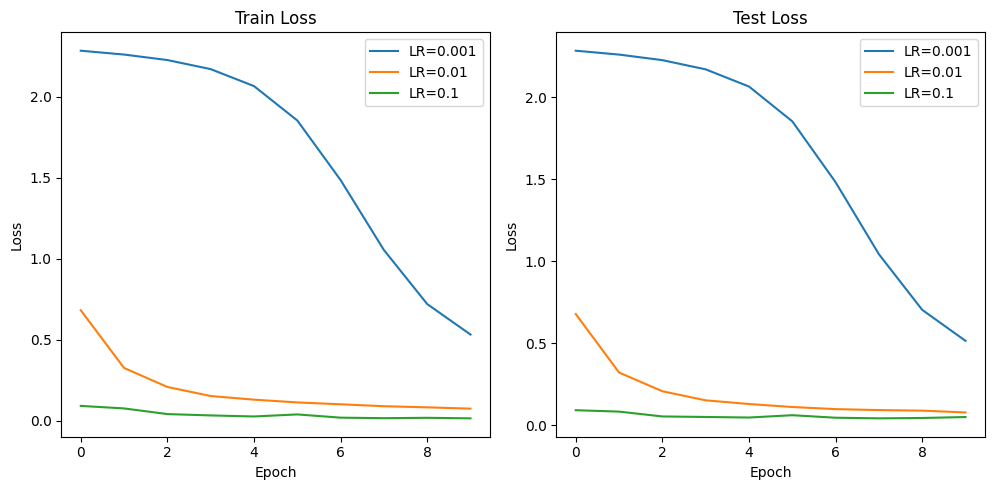

In [ ]:
# Thí nghiệm tác động của tỷ lệ học tập
learning_rates = [0.001, 0.01, 0.1]
experiment_learning_rate(learning_rates)

* Tỷ lệ học xác định bước nhảy theo hướng đối diện của gradient trong quá trình tối ưu hóa.
* Tỷ lệ học cao có thể tăng tốc độ hội tụ ban đầu nhưng có thể khiến bộ tối ưu vượt quá điểm cực tiểu, dẫn đến phân kỳ hoặc dao động.
* Tỷ lệ học thấp có thể cải thiện ổn định nhưng có thể làm chậm quá trình hội tụ và nguy cơ bị mắc kẹt ở cực tiểu cục bộ hoặc điểm ngứa.
* Chọn lịch trình giảm tỷ lệ học phù hợp (ví dụ: giảm dần tỷ lệ học theo thời gian) có thể giúp giảm thiểu các vấn đề này.

In [ ]:
import torch.nn.functional as F
class Net1(nn.Module):
    def __init__(self, num_channels):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, num_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_channels, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Train Epoch: 1 [0/30000 (0%)]	Loss: 2.302266
Train Epoch: 1 [12800/30000 (43%)]	Loss: 2.294266
Train Epoch: 1 [25600/30000 (85%)]	Loss: 2.241073
Train Epoch: 2 [0/30000 (0%)]	Loss: 2.180564
Train Epoch: 2 [12800/30000 (43%)]	Loss: 1.671087
Train Epoch: 2 [25600/30000 (85%)]	Loss: 0.579688
Train Epoch: 3 [0/30000 (0%)]	Loss: 0.658733
Train Epoch: 3 [12800/30000 (43%)]	Loss: 0.316930
Train Epoch: 3 [25600/30000 (85%)]	Loss: 0.324622
Train Epoch: 4 [0/30000 (0%)]	Loss: 0.261861
Train Epoch: 4 [12800/30000 (43%)]	Loss: 0.232036
Train Epoch: 4 [25600/30000 (85%)]	Loss: 0.151372
Train Epoch: 5 [0/30000 (0%)]	Loss: 0.188893
Train Epoch: 5 [12800/30000 (43%)]	Loss: 0.107119
Train Epoch: 5 [25600/30000 (85%)]	Loss: 0.280690
Train Epoch: 6 [0/30000 (0%)]	Loss: 0.137868
Train Epoch: 6 [12800/30000 (43%)]	Loss: 0.152988
Train Epoch: 6 [25600/30000 (85%)]	Loss: 0.175192
Train Epoch: 7 [0/30000 (0%)]	Loss: 0.123662
Train Epoch: 7 [12800/30000 (43%)]	Loss: 0.121293
Train Epoch: 7 [25600/30000 (85%)]	

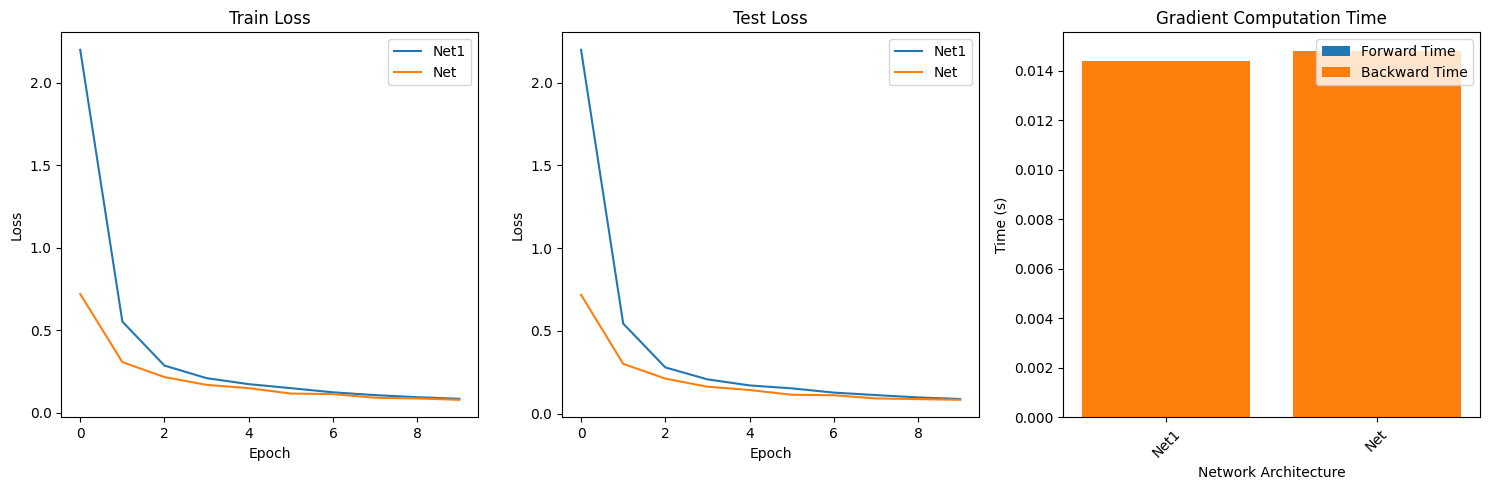

In [ ]:
# Example usage
architectures = [Net1, Net]
experiment_network_arch(architectures)

* Kiến trúc mạng, bao gồm số lượng tầng, loại tầng (ví dụ: tầng tích chập, tầng truy hồi, tầng kết nối đầy đủ) và mối liên kết giữa các tầng, có thể ảnh hưởng đáng kể đến quá trình đào tạo.
* Mạng sâu với nhiều tầng có thể tăng khả năng mô hình và cho phép học các biểu diễn phức tạp hơn, nhưng chúng cũng có thể gặp vấn đề như gradient biến mất/bùng nổ và khó khăn trong tối ưu hóa.
* Lựa chọn các hàm kích hoạt, các kết nối tầng nhảy, các tầng chuẩn hóa và các thành phần kiến trúc khác có thể ảnh hưởng đến dòng chảy của gradient và bề mặt tối ưu hóa.
* Một số lựa chọn kiến trúc như phụ thuộc trong phạm vi dài trong mạng truy hồi hoặc cơ chế tập trung, có thể đưa ra thêm các thách thức cho việc tính toán và truyền gradient.